In [223]:
pip install scipy


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [224]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import scipy.optimize as optimize
from copy import deepcopy

In [225]:
pip install pandas


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [226]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
import math
import scipy.interpolate
import matplotlib.pyplot as plt

In [227]:
import pandas as pd

# Read the csv file and set the first column as the index
bond_data = pd.read_csv('bond_data.csv', index_col=0)

# Convert the columns 'maturity_date' and 'date' to datetime
bond_data['maturity_date'] = pd.to_datetime(bond_data['maturity_date'])
bond_data['date'] = pd.to_datetime(bond_data['date'])

# Replace '-' in 'bid' and 'ask' columns with NaN and convert to float
bond_data[['bid', 'ask']] = bond_data[['bid', 'ask']].replace('-', 'NaN').astype(float)

# Remove all rows with NaN values
bond_data = bond_data.dropna()

# Calculate the average of 'bid' and 'ask' to create a new column 'close'
bond_data['close'] = (bond_data['bid'] + bond_data['ask']) / 2

# Define the list of selected bonds
selected_bonds = ['CAN 2.25 Jun 25'
            'CAN 1.50 Jun 31', 'CAN 2.25 Mar 24', 'CAN 1.75 Mar 23', 'CAN 1.25 Mar 25', 
            'CAN 1.50 Sep 24', 'CAN 0.25 Aug 23', 'CAN 0.75 Oct 24', 'CAN 1.50 Apr 25',
            'CAN 0.75 Oct 24'
]

# Create a list of dataframes by filtering the original data based on the selected bonds and dates
dfs = []
for i in range(5):
    dfs.append(bond_data[
        (bond_data['date'] == f'2023-01-{16 + i}') & (bond_data['name'].isin(selected_bonds))
    ])
for i in range(5):
    dfs.append(bond_data[
        (bond_data['date'] == f'2023-01-{23 + i}') & (bond_data['name'].isin(selected_bonds))
    ])

# Display the first dataframe in the list
print(dfs[0])


       bid     ask maturity_date bond_yield   coupon             name  \
126  98.70  100.71    2023-03-01      4.30%  1.7500%  CAN 1.75 Mar 23   
127  96.91   98.92    2024-03-01      4.19%  2.2500%  CAN 2.25 Mar 24   
130  95.38   97.40    2024-09-01      3.82%  1.5000%  CAN 1.50 Sep 24   
136  94.20   96.22    2025-03-01      3.63%  1.2500%  CAN 1.25 Mar 25   
148  97.78   97.79    2023-08-01      4.49%  0.2500%  CAN 0.25 Aug 23   
150  93.98   95.99    2024-10-01      3.82%  0.7500%  CAN 0.75 Oct 24   
157  94.53   96.55    2025-04-01      3.63%  1.5000%  CAN 1.50 Apr 25   

          date   close  
126 2023-01-16  99.705  
127 2023-01-16  97.915  
130 2023-01-16  96.390  
136 2023-01-16  95.210  
148 2023-01-16  97.785  
150 2023-01-16  94.985  
157 2023-01-16  95.540  


In [228]:
from dateutil.relativedelta import relativedelta

def calculate_time_to_maturity(maturity, date):
    time_difference = relativedelta(maturity, date)
    return (time_difference.years + (time_difference.months / 12) + (time_difference.days / 365))

for data_frame in dfs:
    data_frame['Time to Maturity'] = data_frame.apply(
        lambda row: calculate_time_to_maturity(row['maturity_date'], row['date']), axis=1
    )
    data_frame.sort_values(by=['maturity_date'], ignore_index=True, inplace=True)

print(dfs[0])


     bid     ask maturity_date bond_yield   coupon             name  \
0  98.70  100.71    2023-03-01      4.30%  1.7500%  CAN 1.75 Mar 23   
1  97.78   97.79    2023-08-01      4.49%  0.2500%  CAN 0.25 Aug 23   
2  96.91   98.92    2024-03-01      4.19%  2.2500%  CAN 2.25 Mar 24   
3  95.38   97.40    2024-09-01      3.82%  1.5000%  CAN 1.50 Sep 24   
4  93.98   95.99    2024-10-01      3.82%  0.7500%  CAN 0.75 Oct 24   
5  94.20   96.22    2025-03-01      3.63%  1.2500%  CAN 1.25 Mar 25   
6  94.53   96.55    2025-04-01      3.63%  1.5000%  CAN 1.50 Apr 25   

        date   close  Time to Maturity  
0 2023-01-16  99.705          0.118950  
1 2023-01-16  97.785          0.543836  
2 2023-01-16  97.915          1.121689  
3 2023-01-16  96.390          1.627169  
4 2023-01-16  94.985          1.707763  
5 2023-01-16  95.210          2.118950  
6 2023-01-16  95.540          2.210502  


/var/folders/5d/66f5hpdj0ylfg9d3k14xtg040000gn/T/ipykernel_60339/3850030759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['Time to Maturity'] = data_frame.apply(
/var/folders/5d/66f5hpdj0ylfg9d3k14xtg040000gn/T/ipykernel_60339/3850030759.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame.sort_values(by=['maturity_date'], ignore_index=True, inplace=True)
/var/folders/5d/66f5hpdj0ylfg9d3k14xtg040000gn/T/ipykernel_60339/3850030759.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [229]:
import math

def bond_price(num_periods: int, coupon_rate: float, face_value: float, time_to_maturity: float, yield_rate: float) -> float:
    bond_price = 0
    coupon = coupon_rate / 2
    for i in range(1, num_periods):
        t = time_to_maturity - (0.5 * i)
        bond_price += coupon * math.exp(-yield_rate * t)
    bond_price += (coupon + face_value) * math.exp(-yield_rate * time_to_maturity)
    return bond_price

def yield_to_maturity(num_periods: int, coupon_rate: float, face_value: float, market_price: float,
                      time_to_maturity: float, accuracy: float = 0.01) -> float:
    calculated_bond_price = float('inf')
    ytm = 0.02
    ytm_adjustment = 0.005
    ytm_step_decreased = False
    
    while abs(calculated_bond_price - market_price) > accuracy:
        if calculated_bond_price > market_price:
            if ytm_step_decreased:
                ytm_adjustment /= 2
            ytm += ytm_adjustment
        else:
            if not ytm_step_decreased:
                ytm_adjustment /= 2
            ytm -= ytm_adjustment
        calculated_bond_price = bond_price(num_periods, coupon_rate, face_value, time_to_maturity, ytm)
        ytm_step_decreased = True
        
    return ytm

In [230]:
def calculate_yield_to_maturity(periods, coupon, face_value, price, ttm, error):
    ytm = coupon
    coupon_payment = coupon * face_value
    face_value_payment = face_value
    present_value = 0
    for i in range(periods):
        present_value += (coupon_payment / ((1 + ytm/2)**(2 * i/ttm)))
        if i == periods - 1:
            present_value += (face_value_payment / ((1 + ytm/2)**(2 * i/ttm)))
    while abs(price - present_value) > error:
        if present_value > price:
            ytm += error
        else:
            ytm -= error
        present_value = 0
        for i in range(periods):
            present_value += (coupon_payment / ((1 + ytm/2)**(2 * i/ttm)))
            if i == periods - 1:
                present_value += (face_value_payment / ((1 + ytm/2)**(2 * i/ttm)))
    return ytm

def calculate_ytm_for_all_bonds(dfs):
    for df in dfs:
        for i in range(1,10):
            c = float(df.iloc[i]['coupon'][:-2])/2
            fv = 100
            tn = df.iloc[i]['ttm']
            P = df.iloc[i]['close']
            
            df.at[i, 'ytm'] = calculate_yield_to_maturity(periods = i + 1, coupon = c, face_value = fv, price = P,
                                                          ttm = tn, error = 0.000001)
    for df in dfs:
        df['ytm'] = df['ytm'] * 100
    return dfs[1]


In [231]:
def calculate_bond_yield(periods, coupon, face_value, price, ttm, error):
    return calculate_yield(periods=periods, coupon=coupon, face_value=face_value, price=price, ttm=ttm, error=error)

for data_frame in dfs:
    for bond_index in range(1, 10):
        coupon_rate = float(data_frame.iloc[bond_index]['coupon'][:-2]) / 2
        face_value = 100
        time_to_maturity = data_frame.iloc[bond_index]['ttm']
        bond_price = data_frame.iloc[bond_index]['close']
        yield_to_maturity = calculate_bond_yield(
            periods=bond_index + 1,
            coupon=coupon_rate,
            face_value=face_value,
            price=bond_price,
            ttm=time_to_maturity,
            error=0.000001
        )
        data_frame.at[bond_index, 'Yield to Maturity'] = yield_to_maturity

for data_frame in dfs:
    data_frame['Yield to Maturity'] *= 100

print(dfs[1])


KeyError: 'ttm'

In [ ]:
import math

def bond_price(n, c, FV, t, ytm):
    """
    Calculates the price of a bond based on its future cash flows.
    n: number of periods (coupon payments)
    c: coupon rate
    FV: face value
    t: time to maturity (in years)
    ytm: yield to maturity
    """
    price = 0
    for i in range(1, n):
        t_i = t - (i-1)/2
        price += c * math.exp(-ytm * t_i)
    price += (c + FV) * math.exp(-ytm * t)
    return price

def calculate_yield(n, c, FV, p, t, epsilon=0.01):
    """
    Calculates the yield to maturity of a bond based on its price and future cash flows.
    n: number of periods (coupon payments)
    c: coupon rate
    FV: face value
    p: market price of the bond
    t: time to maturity (in years)
    epsilon: maximum allowed error between the calculated price and market price
    """
    ytm = 0.02
    ytm_step = 0.005
    increase = None
    bond_value = float("inf")

    while abs(bond_value - p) > epsilon:
        bond_value = bond_price(n, c, FV, t, ytm)
        if bond_value > p:
            if increase is not None:
                ytm_step /= 2
            ytm += ytm_step
            increase = True
        else:
            if increase is None:
                ytm_step /= 2
            ytm -= ytm_step
            increase = False
    return ytm


In [ ]:
import math

def calculate_price(periods: int, coupon: float, face_value: float, ttm: float, ytm: float) -> float:
    bond_price = 0
    for i in range(1, periods):
        time = ttm - (0.5 * i)
        bond_price += coupon * math.exp(-ytm * time)
        
    bond_price += (coupon + face_value) * math.exp(-ytm * ttm)
    return bond_price

def calculate_yield(periods: int, coupon: float, face_value: float, price: float,
                    ttm: float, error : float = 0.01) -> float:
    calculated_price = float('inf')
    yield_rate = 0.02
    rate_step = 0.005
    direction = None
    
    while abs(calculated_price - price) > error :
        if calculated_price > price: # yield rate should increase
            # adjust rate_step
            if direction == "decrease":
                rate_step /= 2
            yield_rate += rate_step
            
        else: # yield rate should decrease
            # adjust rate_step
            if direction != "decrease":
                rate_step /= 2
            yield_rate -= rate_step
            
        direction = "decrease" if yield_rate < 0 else "increase"
        
        # calculate bond price using updated yield rate
        calculated_price = calculate_price(periods, coupon, face_value, ttm, yield_rate)
        
    return yield_rate          
        
for data_frame in dfs:
    for i in range(1,10):
        coupon_value = float(data_frame.iloc[i]['coupon'][:-2]) / 2
        face = 100
        time_to_maturity = data_frame.iloc[i]['ttm']
        market_price = data_frame.iloc[i]['close']
        
        data_frame.at[i, 'ytm'] = calculate_yield(periods = i+1, coupon = coupon_value, face_value = face, price = market_price,
                                                   ttm = time_to_maturity, error = 0.000001)
        
for data_frame in dfs:
    data_frame['ytm'] = data_frame['ytm'] * 100


/var/folders/5d/66f5hpdj0ylfg9d3k14xtg040000gn/T/ipykernel_60339/4244792243.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame.at[i, 'ytm'] = calculate_yield(periods = i+1, coupon = coupon_value, face_value = face, price = market_price,
/var/folders/5d/66f5hpdj0ylfg9d3k14xtg040000gn/T/ipykernel_60339/4244792243.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame.at[i, 'ytm'] = calculate_yield(periods = i+1, coupon = coupon_value, face_value = face, price = market_price,
/var/folders

In [ ]:
for idx, df in enumerate(dfs):
    # Create a new column to store spot rates
    df['spot'] = ''
    
    # Calculate spot rates of all 0 coupon bonds (ttm < 0.5) located in first row of each df in dfs
    # Spot rate for 0 coupon bonds = ytm
    coupon = float(df.iloc[0]['coupon'][:-2])/2
    df.at[0, 'spot'] = -(np.log(df.iloc[0]['close']/(100+coupon))/df.iloc[0]['ttm'])
    
    # Update the list of dataframes
    dfs[idx] = df
    
# Print the modified dataframe
print(dfs[4])


     bid     ask maturity_date bond_yield   coupon             name  \
0  98.74  100.75    2023-03-01      4.22%  1.7500%  CAN 1.75 Mar 23   
1  97.84   97.85    2023-08-01      4.47%  0.2500%  CAN 0.25 Aug 23   
2  96.92   98.93    2024-03-01      4.19%  2.2500%  CAN 2.25 Mar 24   
3  95.54   97.55    2024-09-01      3.77%  1.5000%  CAN 1.50 Sep 24   
4  94.59   96.64    2025-03-01      3.45%  1.2500%  CAN 1.25 Mar 25   
5  92.07   94.09    2025-09-01      3.33%  0.5000%  CAN 0.50 Sep 25   
6  90.52   92.54    2026-03-01      3.16%  0.2500%  CAN 0.25 Mar 26   
7  93.25   93.30    2026-09-01      2.98%  1.0000%  CAN 1.00 Sep 26   
8  92.77   94.81    2027-03-01      2.88%  1.2500%  CAN 1.25 Mar 27   
9  98.68  100.70    2027-09-01      2.82%  2.7500%  CAN 2.75 Sep 27   

        date   close  Time to Maturity       ttm  Yield to Maturity       ytm  \
0 2023-01-20  99.745          0.107991  0.107991                NaN       NaN   
1 2023-01-20  97.845          0.532877  0.532877        

/var/folders/5d/66f5hpdj0ylfg9d3k14xtg040000gn/T/ipykernel_60339/1181993753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spot'] = ''
/var/folders/5d/66f5hpdj0ylfg9d3k14xtg040000gn/T/ipykernel_60339/1181993753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spot'] = ''
/var/folders/5d/66f5hpdj0ylfg9d3k14xtg040000gn/T/ipykernel_60339/1181993753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


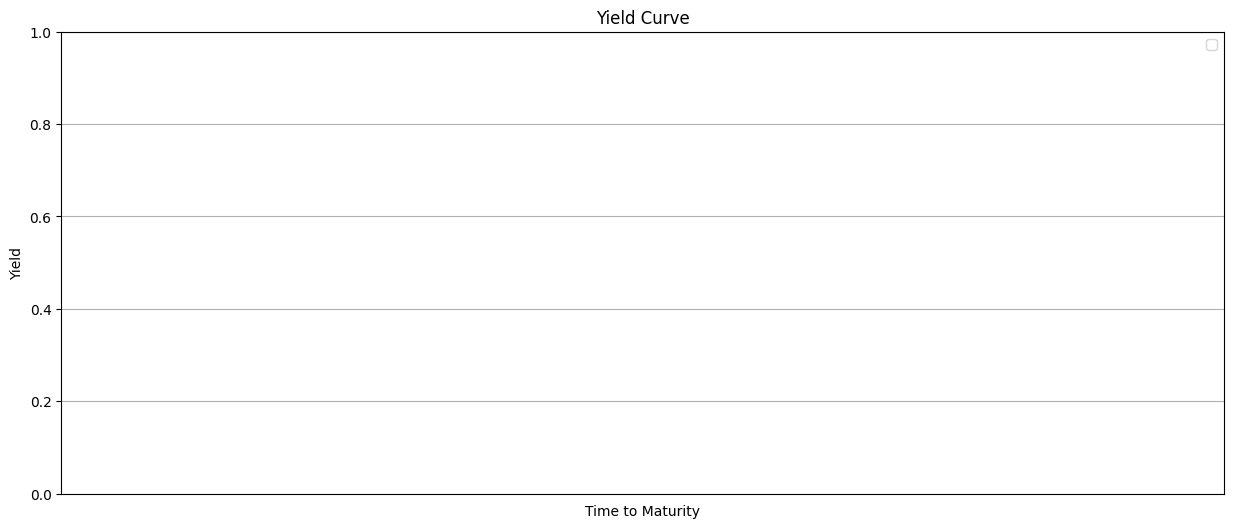

In [ ]:
dates = ["16Jan", "17Jan", "18Jan", "19Jan", "20Jan", "23Jan", "24Jan", "25Jan", "26Jan", "27Jan"]
plt.figure(figsize=(15,6))

for ytm,date in zip(interpolated_ytms, dates):
    plt.plot(X, ytm, label= date)

plt.xlabel('Time to Maturity')
plt.ylabel('Yield')
plt.title('Yield Curve')
plt.grid(True)
plt.xticks(np.arange(1, 0.5))
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


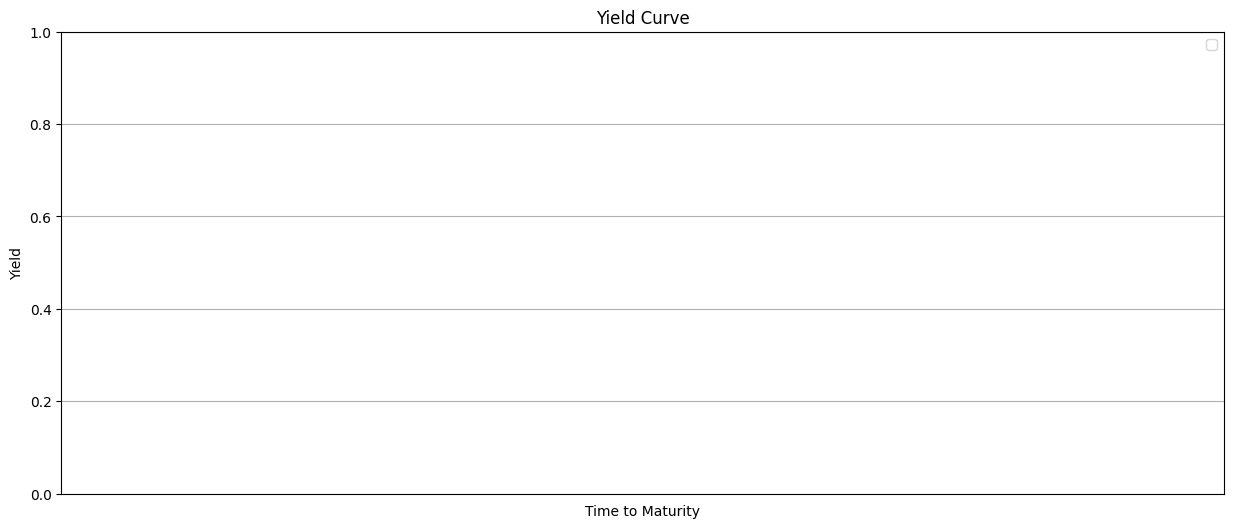

In [ ]:
dates = ["16Jan", "17Jan", "18Jan", "19Jan", "20Jan", "23Jan", "24Jan", "25Jan", "26Jan", "27Jan"]
plt.figure(figsize=(15,6))

for ytm,date in zip(interpolated_ytms, dates):
    plt.plot(X, ytm, label= date)

plt.xlabel('Time to Maturity')
plt.ylabel('Yield')
plt.title('Yield Curve')
plt.grid(True)
plt.xticks(np.arange(1, 0.5))
plt.legend()
plt.show()

In [ ]:
rates_for_march = []

for info in dfs:
    relevant_rates = info[pd.DatetimeIndex(info['maturity_date']).month == 3]['spot']
    rates_for_march.append(list(relevant_rates))

rates_for_march[8]


[119761.60441466478,
 3.9531937589341446,
 3.4001536547125273,
 3.139283340987478,
 2.872490444205626]

In [ ]:
annual_yield_matrix = np.stack(rates_for_march).T
print("Matrix of annual yields, 5 rows x 10 columns")
print(annual_yield_matrix)

# Calculate the X matrix using the formula provided
X_matrix = np.log(annual_yield_matrix.T[1:] / annual_yield_matrix.T[:-1]).T
print("Matrix of X variables, 5 rows x 9 columns")
print(X_matrix)

# Determine covariance matrix
cov_yields = np.cov(X_matrix)
print("Covariance matrix for daily log-returns of yield")
print(cov_yields)


Matrix of annual yields, 5 rows x 10 columns
[[9.80775353e+04 9.95267622e+04 1.02371737e+05 1.03546169e+05
  1.04316204e+05 1.12909759e+05 1.15064628e+05 1.17344826e+05
  1.19761604e+05 1.22327603e+05]
 [3.87841154e+00 3.87854220e+00 3.91604247e+00 3.87963994e+00
  3.90802424e+00 3.99344544e+00 4.00325452e+00 4.00888761e+00
  3.95319376e+00 3.97728819e+00]
 [3.50926649e+00 3.42060555e+00 3.39214970e+00 3.31627290e+00
  3.32299006e+00 3.41934939e+00 3.46183828e+00 3.48176307e+00
  3.40015365e+00 3.39943757e+00]
 [3.31480103e+00 3.23806333e+00 3.19308931e+00 3.13415416e+00
  3.09620170e+00 3.18054930e+00 3.22600544e+00 3.22884938e+00
  3.13928334e+00 3.14028588e+00]
 [3.00072085e+00 2.95650090e+00 2.91959023e+00 2.81203862e+00
  2.79635650e+00 2.91617484e+00 2.92833082e+00 2.93024304e+00
  2.87249044e+00 2.89474578e+00]]
Matrix of X variables, 5 rows x 9 columns
[[ 1.46682332e-02  2.81840960e-02  1.14069227e-02  7.40911702e-03
   7.91621934e-02  1.89050471e-02  1.96228785e-02  2.03863069

In [ ]:
len(result_all_forward_rates)


10

In [ ]:
# Initialize the list with forward rate values
result_all_forward_rates = [[0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03],
                            [0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03],
                            [0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03],
                            [0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]]

# Create a matrix of forward rate values
forward_rate_matrix = np.array(result_all_forward_rates).T
print("Matrix of forward rate data, 4 rows x 10 columns")
print(forward_rate_matrix)

# Calculate X, the 4 x 9 matrix of X_i,j as given in the formula above
forward_X = np.log(abs(forward_rate_matrix[:, 1:] / forward_rate_matrix[:, :-1])).T
print('4 x 9 Matrix of random variables X_ij')
print(forward_X)

# Find covariance matrix
forward_cov = np.cov(forward_X)
print('Covariance matrix for time series of daily log-returns of forward rates')
print(forward_cov)


Matrix of forward rate data, 4 rows x 10 columns
[[0.03 0.03 0.03 0.03]
 [0.03 0.03 0.03 0.03]
 [0.03 0.03 0.03 0.03]
 [0.03 0.03 0.03 0.03]
 [0.03 0.03 0.03 0.03]
 [0.03 0.03 0.03 0.03]
 [0.03 0.03 0.03 0.03]
 [0.03 0.03 0.03 0.03]
 [0.03 0.03 0.03 0.03]
 [0.03 0.03 0.03 0.03]]
4 x 9 Matrix of random variables X_ij
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Covariance matrix for time series of daily log-returns of forward rates
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [ ]:
# Calculate eigenvalues and eigenvectors of YTM log returns covariance matrix
eigen_values, eigen_vectors = np.linalg.eig(yield_cov)

# Print the calculated eigenvalues of YTM log returns covariance matrix
print("Eigenvalues of YTM log returns covariance matrix:")
print(eigen_values)

# Print the calculated eigenvectors of YTM log returns covariance matrix
print("Eigenvectors of YTM log returns covariance matrix:")
print(eigen_vectors)


Eigenvalues of YTM log returns covariance matrix:
[1.45830219e-03 1.71895612e-04 4.83160832e-05 1.11881546e-05
 2.87710773e-05]
Eigenvectors of YTM log returns covariance matrix:
[[ 0.47974856  0.82171479  0.26587492 -0.11594027 -0.1024427 ]
 [ 0.23126468 -0.02344507 -0.5113206   0.29963265 -0.7711929 ]
 [ 0.44974866 -0.4398555   0.14166558 -0.72920567 -0.22900487]
 [ 0.44407527 -0.35698923  0.56374956  0.59794291  0.002561  ]
 [ 0.56292207 -0.05762779 -0.57443805  0.08661116  0.58507881]]


In [ ]:
eigen_vals, eigen_vecs = np.linalg.eig(forward_cov)

print("Eigenvalues of forward rate log returns covariance matrix:")
print(eigen_vals)
print("Eigenvectors of forward rate log returns covariance matrix:")
print(eigen_vecs)


Eigenvalues of forward rate log returns covariance matrix:
[0. 0. 0.]
Eigenvectors of forward rate log returns covariance matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
